In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

print("Shape:", df.shape)
df.head()

Shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

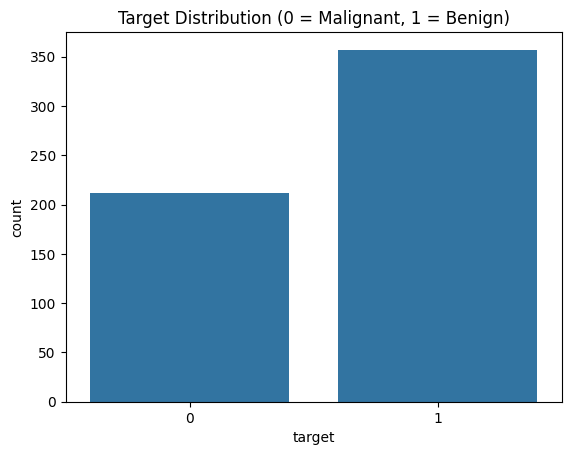

In [6]:
sns.countplot(x="target", data=df)
plt.title("Target Distribution (0 = Malignant, 1 = Benign)")
plt.show()

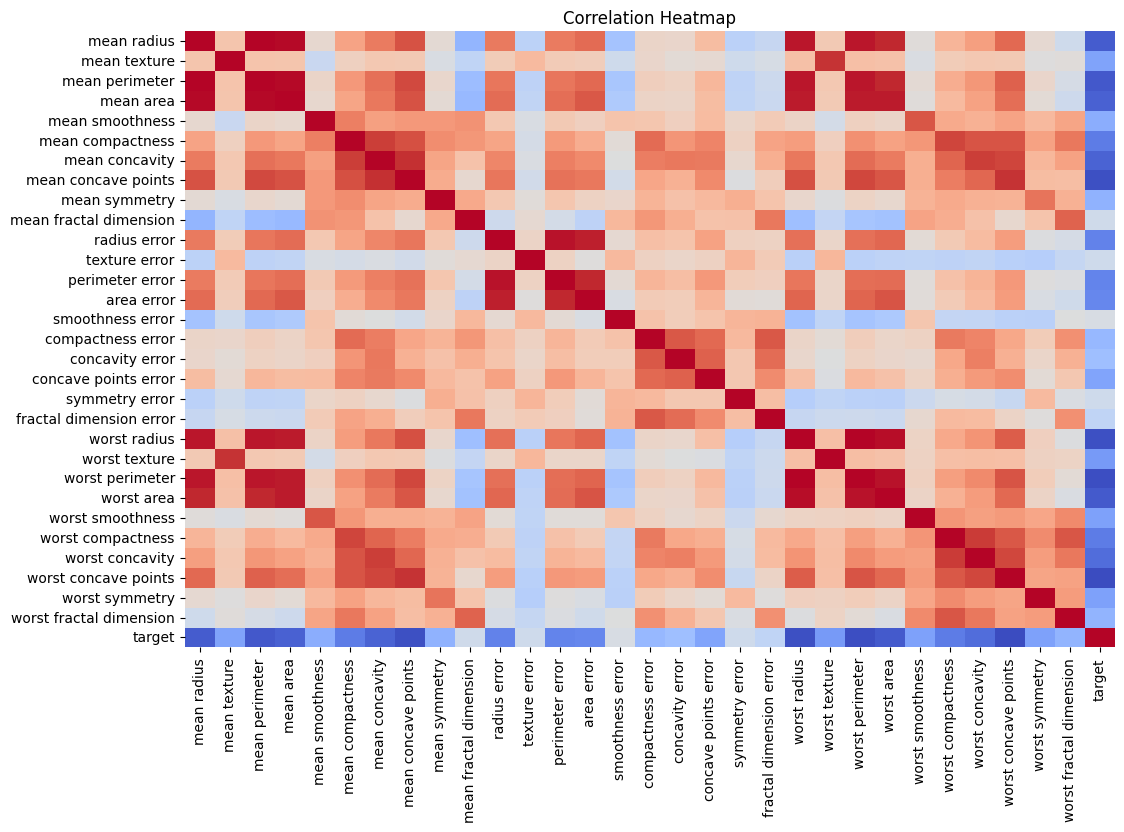

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", cbar=False)
plt.title("Correlation Heatmap")
plt.show()

In [8]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 455
Test size: 114


In [11]:
svm_linear = SVC(kernel="linear", random_state=42)
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)

In [12]:
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))

Linear SVM Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



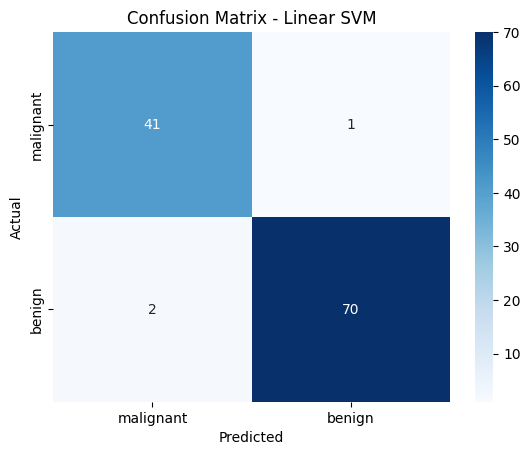

In [13]:
cm = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix - Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
svm_rbf = SVC(kernel="rbf", random_state=42)
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

In [15]:
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))

RBF SVM Accuracy: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [16]:
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [1, 0.1, 0.01, 0.001],
    "kernel": ["rbf"]
}

In [17]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score: 0.9802197802197803


In [18]:
svm_best = grid.best_estimator_
cv_scores = cross_val_score(svm_best, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.62280702 0.62280702 0.63157895 0.64035088 0.61946903]
Mean CV Accuracy: 0.6274025772395591


In [19]:
from matplotlib.colors import ListedColormap

X_2d = df[["mean radius", "mean texture"]].values
y_2d = df["target"]

In [20]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_2d, y_2d, test_size=0.2, random_state=42, stratify=y_2d
)

In [21]:
scaler2 = StandardScaler()
X_train2 = scaler2.fit_transform(X_train2)
X_test2 = scaler2.transform(X_test2)

In [22]:
svm_vis = SVC(kernel="rbf", C=1, gamma=0.1)
svm_vis.fit(X_train2, y_train2)

x_min, x_max = X_train2[:, 0].min()-1, X_train2[:, 0].max()+1
y_min, y_max = X_train2[:, 1].min()-1, X_train2[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [23]:
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ['red', 'green']

<Figure size 800x600 with 0 Axes>

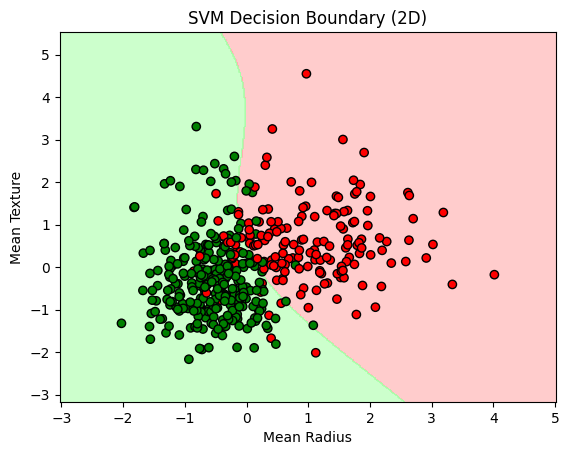

In [24]:
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train2, edgecolor='k', cmap=ListedColormap(cmap_bold))
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.title("SVM Decision Boundary (2D)")
plt.show()

In [25]:
print("\nSome Observations:")
print("1. Linear SVM works well on linearly separable data.")
print("2. RBF kernel handles non-linear decision boundaries better.")
print("3. C controls margin hardness: low C = soft margin, high C = hard margin.")
print("4. Gamma defines influence of each data point in RBF kernel.")
print("5. Cross-validation ensures better generalization and prevents overfitting.")


Some Observations:
1. Linear SVM works well on linearly separable data.
2. RBF kernel handles non-linear decision boundaries better.
3. C controls margin hardness: low C = soft margin, high C = hard margin.
4. Gamma defines influence of each data point in RBF kernel.
5. Cross-validation ensures better generalization and prevents overfitting.
